In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
import numpy as np
import io
import requests
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Download the mushroom dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)

# Rename the columns to meaningful names
df.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
              'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
              'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
              'stalk-surface-below-ring', 'stalk-color-above-ring', 
              'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
              'ring-type', 'spore-print-color', 'population', 'habitat']

# Preprocess the dataset
X = df.drop(['class'], axis=1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)


## PCA method

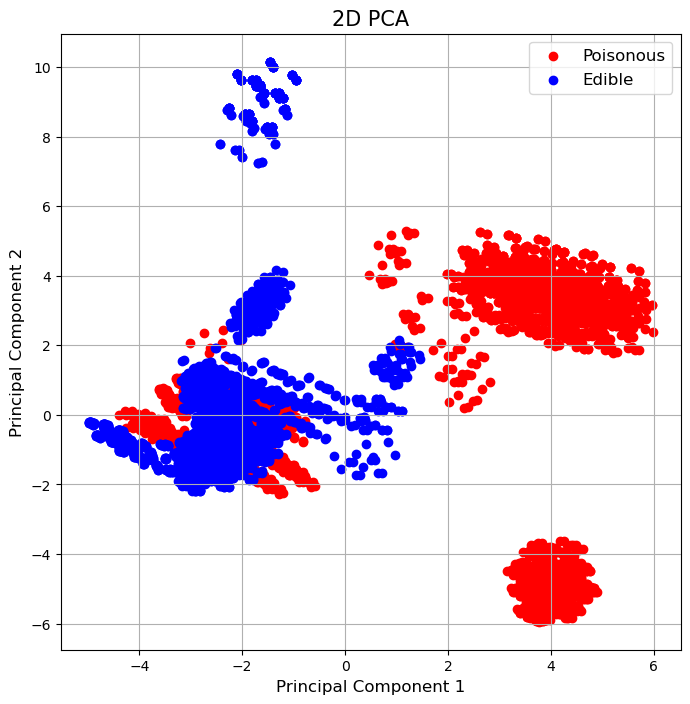

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])

fig, ax = plt.subplots(figsize=(8, 8))
classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    ax.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
               PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
               c=color, label='Poisonous' if clas==1 else 'Edible')
    
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('2D PCA', fontsize=15)
ax.legend(fontsize=12)
ax.grid()

# Save the figure as an image file
fig.savefig('pca_plot.png', dpi=300)


In [13]:
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X)
print(pca.explained_variance_)

forest_test(X_pca, Y)

[10.31484926  9.42671062  8.35720548]


0.9821538461538462

## ICA

In [21]:

from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

forest_test(X_ica, Y)

0.9895384615384616

## LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])
forest_test(X_lda, Y)

Original number of features: 117
Reduced number of features: 1


1.0

In [24]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.019295999999997093
[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## LLE

In [26]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_lle = embedding.fit_transform(X)

forest_test(X_lle, Y)

0.5243076923076923

## t-sne

In [28]:
from sklearn.manifold import TSNE

start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)
forest_test(X_tsne, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.001s...


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 8124 samples in 2.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658539
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.668983
[t-SNE] KL divergence after 300 iterations: 1.912995
174.53130599999997


1.0

## autoencoders

In [2]:
import tensorflow as tf

# Define the encoder and decoder models
def encoder_model(input_shape, encoding_dim):
    inputs = tf.keras.layers.Input(shape=input_shape)
    encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(inputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=encoded)
    return model

def decoder_model(encoding_dim, output_shape):
    inputs = tf.keras.layers.Input(shape=(encoding_dim,))
    decoded = tf.keras.layers.Dense(output_shape, activation='sigmoid')(inputs)
    model = tf.keras.models.Model(inputs=inputs, outputs=decoded)
    return model

# Define the autoencoder model
def autoencoder_model(input_shape, encoding_dim):
    inputs = tf.keras.layers.Input(shape=input_shape)
    encoder = encoder_model(input_shape, encoding_dim)
    decoder = decoder_model(encoding_dim, input_shape[0])
    encoded = encoder(inputs)
    decoded = decoder(encoded)
    autoencoder = tf.keras.models.Model(inputs=inputs, outputs=decoded)
    return autoencoder

# Define the training data and train the autoencoder
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

autoencoder = autoencoder_model(x_train.shape[1:], 64)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Extract features from the encoder
encoder = encoder_model(x_train.shape[1:], 64)
encoder.compile(optimizer='adam', loss='binary_crossentropy')
features = encoder.predict(x_train)
print(features.shape)


2023-03-26 17:27:37.057453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2430 - val_loss: 0.1603
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1427 - val_loss: 0.1255
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1170 - val_loss: 0.1070
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1025 - val_loss: 0.0961
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0935 - val_loss: 0.0891
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0876 - val_loss: 0.0844
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0836 - val_loss: 0.0812
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0809 - val_loss: 0.0789
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0789 - val_loss: 0.0773
Epoch 10/50
235/235 [==============